<a href="https://colab.research.google.com/github/reemaratnani/Stocks_Regression/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn import linear_model
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.preprocessing import MinMaxScaler

# import tensorflow as tf
# import keras
# from keras.models import Sequential
# from keras.layers import Conv1D, LSTM, Dense
# from keras.callbacks import LearningRateScheduler
# from tensorflow.keras.losses import Huber
# from keras.optimizers import SGD
#Modeling Metrics
from sklearn import metrics

In [0]:
path = '/content/drive/My Drive/data/AAPL.csv'
stock_data = pd.read_csv(path)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
1,2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2,2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
3,2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
4,2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


In [0]:
stock_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [0]:

stock_data.set_index('Date', inplace=True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


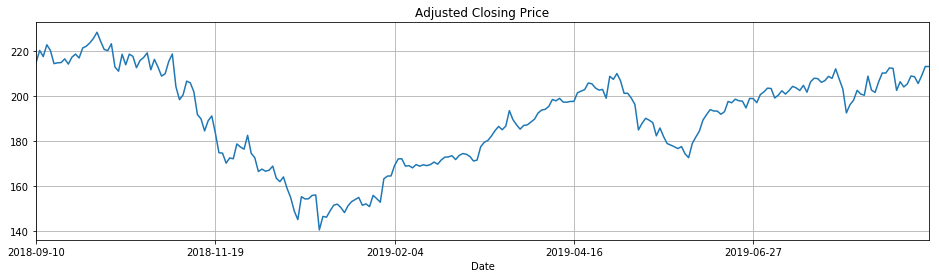

In [0]:
stock_data['Adj Close'].plot(label='MSI', figsize=(16,4), title='Adjusted Closing Price', grid=True)

In [0]:
window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(stock_data) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = stock_data['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [0]:
#Help Functions
def get_performance (model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4)) 
  print('r2_score:', metrics.r2_score(y_test, model_pred).round(4)) 
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)

In [0]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
lr_pred = reg.predict(X_test)

In [0]:
get_performance(lr_pred)

Mean Absolute Error: 3.1314
Mean Squared Error: 15.8461
Root Mean Squared Error: 3.9807


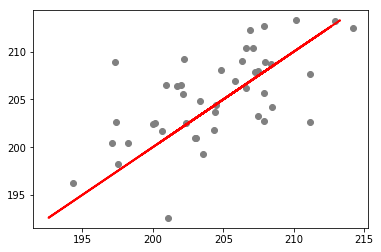

In [0]:
get_plot(lr_pred)

#Method 1: Ridge Regression

In [0]:
# Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
# y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

In [0]:
get_performance(y_pred_ridge)

Mean Absolute Error: 3.1307
Mean Squared Error: 15.842
Root Mean Squared Error: 3.9802


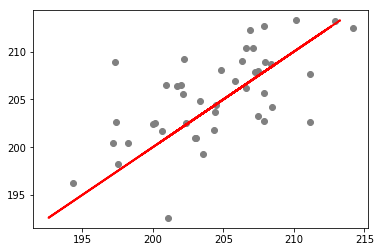

In [0]:

get_plot(y_pred_ridge)

In [0]:

# Same for the test
df_ridge = stock_data.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:]
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='MSI', figsize=(16,4), title='Adjusted Closing Price', grid=True)

#Method 2: Lasso


In [0]:
# Train
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Infer
# y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

In [0]:
get_performance(y_pred_lasso)

Mean Absolute Error: 3.0814
Mean Squared Error: 15.4624
Root Mean Squared Error: 3.9322


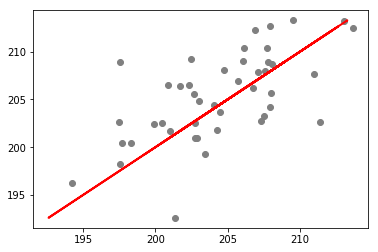

In [0]:
get_plot(y_pred_lasso)

#Method 3: Bayesian Ridge

In [0]:
bayes_model = linear_model.BayesianRidge()
bayes_model.fit(X_train, y_train)
y_pred_bayes = bayes_model.predict(X_test)

In [0]:
get_performance(y_pred_bayes)

Mean Absolute Error: 2.99
Mean Squared Error: 15.4134
Root Mean Squared Error: 3.926


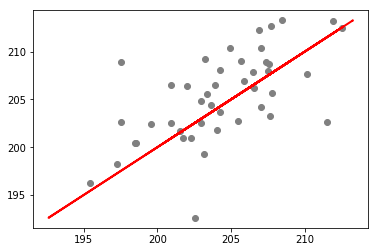

In [0]:
get_plot(y_pred_bayes)